In [1]:
#importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [2]:
# lendo arquivo

dt = pd.read_csv('Dados questão 17.CSV', sep = ';')
dt.head()

NameError: name 'pd' is not defined

**17.a)** Construa um histograma para a distribuição de frequência de chamados em cada uma das estradas

In [3]:
#Função que converte a notação de hora para um número entre 0 e 23

def hours_round(hour):
    lista = hour.split(':')
    hora = int(lista[0])
        
    return hora

In [4]:
# Definindo estilo dos plots

sns.set_style('dark')

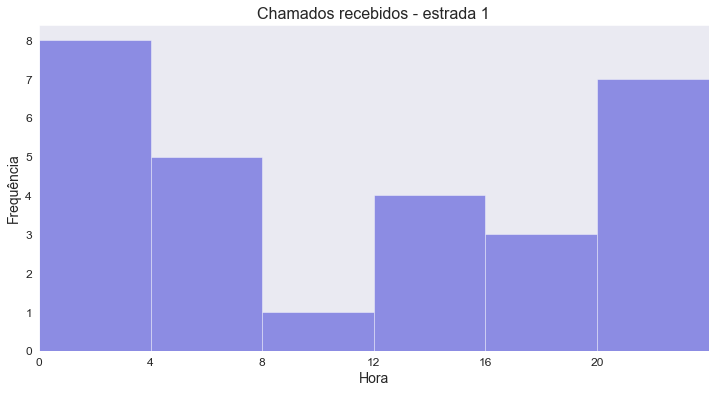

In [9]:
#Construção do histograma para os chamados na estrada 1

plt.figure( figsize = (12,6))

plt.xlabel('Horas', {'fontsize': 14})
plt.ylabel('Frequência', {'fontsize': 14})
plt.title('Chamados recebidos - estrada 1', {'fontsize': 16})
sns.distplot(dt['Estrada 1'].apply(hours_round), bins = [0,4,8,12,16,20,24], axlabel = 'Hora', kde = False, color = 'mediumblue')
plt.xlim(0, 24)
plt.xticks(range(0,24,4))
plt.tick_params(labelsize = 12)
plt.savefig('17a - estrada 1', dpi = 300, format = 'pdf', orientation = 'landscape' )

In [5]:
# Removendo valores faltantes dos chamados na estrada 2

estrada2 = dt.dropna()
estrada2 = estrada2['Estrada 2']

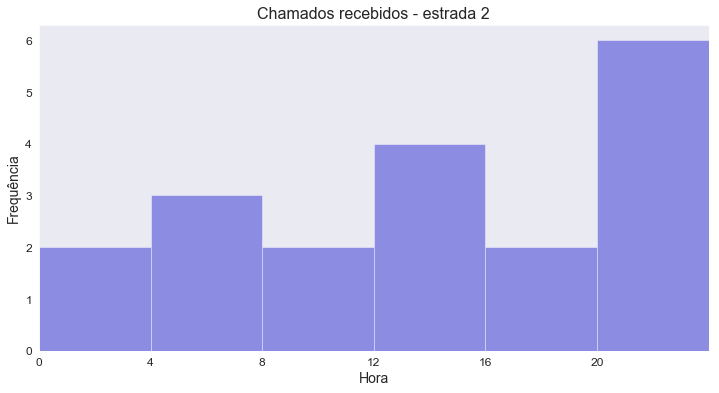

In [11]:
#histograma dos chamados na estrada 2

plt.figure( figsize = (12,6))

plt.xlabel('Horas', {'fontsize': 14})
plt.ylabel('Frequência', {'fontsize': 14})
plt.title('Chamados recebidos - estrada 2', {'fontsize': 16})
sns.distplot(estrada2.apply(hours_round), bins = [0,4,8,12,16,20,24], axlabel = 'Hora', kde = False, color = 'mediumblue')
plt.xlim(0, 24)
plt.xticks(range(0,24,4))
plt.tick_params(labelsize = 12)
plt.savefig('17a - estrada 2', dpi = 300, format = 'pdf', orientation = 'landscape' )

**17.b)** Calcule os intervalos de tempo entre os sucessivos chamados e descreva-os, para cada uma das estradas, utilizando medidas resumo e gráficos do tipo _boxplot_. Existe alguma relação entre o tipo de estrada e o intervalo de tempo entre as chamadas? 

In [7]:
#Função que converte horas em minutos

def hours_to_min(hour):
    hora = hour.split(':')
    minute = int(hora[0])*60 + int(hora[1])
    return minute
    

In [8]:
#Convertando horário de chamadasna estrada 1 em minutos

min_est1 = dt['Estrada 1'].apply(hours_to_min)
min_est1.head()

0      7
1     58
2     84
3     95
4    125
Name: Estrada 1, dtype: int64

In [9]:
#Calculando intervalo entre chamadas sucessivas e armazenando

lista = []
for i in range(27):
    dif = min_est1[i+1] - min_est1[i]
    lista.append(dif)
    
intervalo_est1 = pd.DataFrame(lista, columns=['Intervalo'])
intervalo_est1.head()

,Intervalo
0,51
1,26
2,11
3,30
4,69


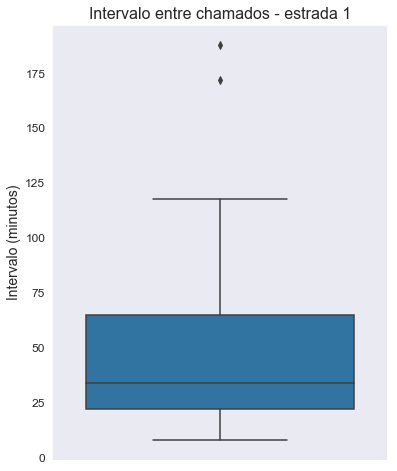

In [19]:
#Boxplot dos intervalos entre chamados na estrada 1

plt.figure(figsize=(6,8))
sns.boxplot(y = 'Intervalo', data= intervalo_est1)
plt.tick_params(labelsize = 12)
plt.ylabel('Intervalo (minutos)', {'fontsize': 14})
plt.title('Intervalo entre chamados - estrada 1', {'fontsize': 16})

plt.savefig('17b - estrada 1', format = 'pdf', dpi = 300)

In [10]:
#Transformando horário das chamadas na estrada 2 em minutos

min_est2 = estrada2.map(hours_to_min)

In [11]:
#Calculando intervalos e armazenando

lista = []
for i in range(17):
    dif = min_est2[i+1] - min_est2[i]
    lista.append(dif)
    
intervalo_est2 = pd.DataFrame(lista, columns=['intervalo'])
intervalo_est2.head()

,intervalo
0,75
1,197
2,98
3,46
4,64


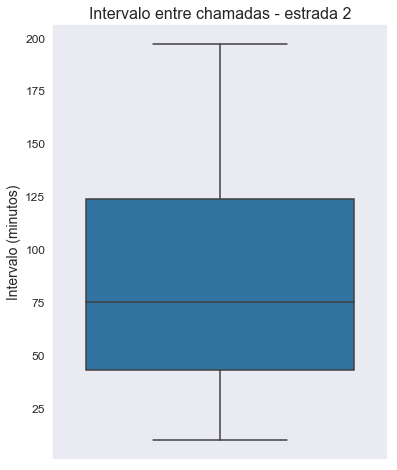

In [22]:
#Boxplot dos intervalos entre chamadas na estrada 2

plt.figure(figsize=(6,8))
sns.boxplot(y = 'intervalo', data= intervalo_est2)
plt.tick_params(labelsize = 12)
plt.ylabel('Intervalo (minutos)', {'fontsize': 14})
plt.title('Intervalo entre chamadas - estrada 2', {'fontsize': 16})

plt.savefig('17b - estrada 2', format='pdf', dpi=300)

In [12]:
#Medidas descritivas dos intervalos para a estrada 1

intervalo_est1.describe().round()

,Intervalo
count,27.0
mean,53.0
std,47.0
min,8.0
25%,22.0
50%,34.0
75%,65.0
max,188.0


In [13]:
#Medidas descritivas dos intervalos para a estrada 2

intervalo_est2.describe().round()

,intervalo
count,17.0
mean,83.0
std,58.0
min,10.0
25%,43.0
50%,75.0
75%,124.0
max,197.0


**Resposta 17.b)**: Com base nos boxplots e nas medidas descritivas, podemos observar que existe uma relação entre o intervalo de chamadas e o tipo de estrada, pois vemos que, na estrada 1, os intervalos entre chamadas são mais baixos que os da entrada 2, analisando de forma geral.




**17.c)** Por intermédio de um gráfico QQ, verifique se a distribuição da variável "Intervalo de tempo entre as chamadas" em cada estrada é compatível com um Modelo Normal. Faça o mesmo para um modelo exponelcial. Compare as distribuições de frequências correspondentes às duas estradas.

In [42]:
#importando bibliotecas necessárias

import statsmodels.api as sm
import scipy.stats as stats

In [25]:
#Normalizando valores para estrada 1

media = intervalo_est1['Intervalo'].mean()
s = intervalo_est1['Intervalo'].std()

normalizados1 = intervalo_est1['Intervalo'].apply(lambda x: (x-media)/s)

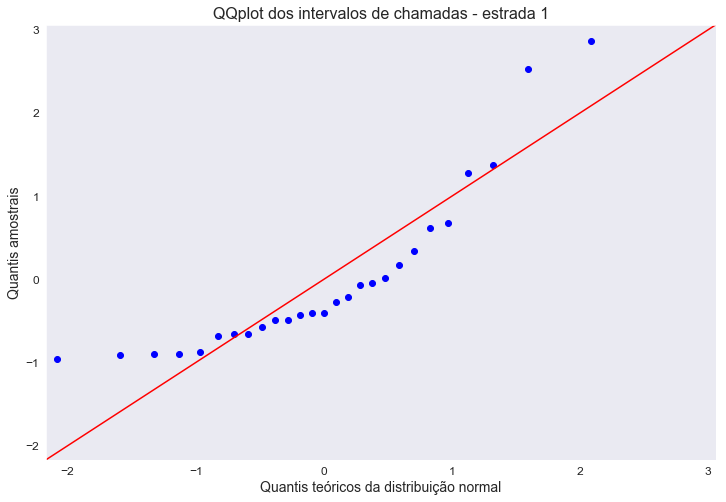

In [36]:
#QQplot dos intervalos de chamadas na estrada 1 usando os quantis da distribuição normal

figure, ax = plt.subplots(figsize=(12,8))
ax.tick_params(labelsize = 12)
ax.set_title('QQplot dos intervalos de chamadas - estrada 1', fontdict={'fontsize': 16})
sm.qqplot(data=normalizados1.sort_values(), a=0.5, loc=0, scale=1, line = '45', ax = ax)
ax.set_xlabel('Quantis teóricos da distribuição normal', fontdict={'fontsize': 14})
ax.set_ylabel('Quantis amostrais', fontdict={'fontsize': 14})

plt.savefig('qqnorm - estrada 1', dpi = 300, format = 'pdf')

In [37]:
#Normalizando valores para estrada 2

media = intervalo_est2['intervalo'].mean()
s = intervalo_est2['intervalo'].std()

normalizados2 = intervalo_est2['intervalo'].apply(lambda x: (x-media)/s)

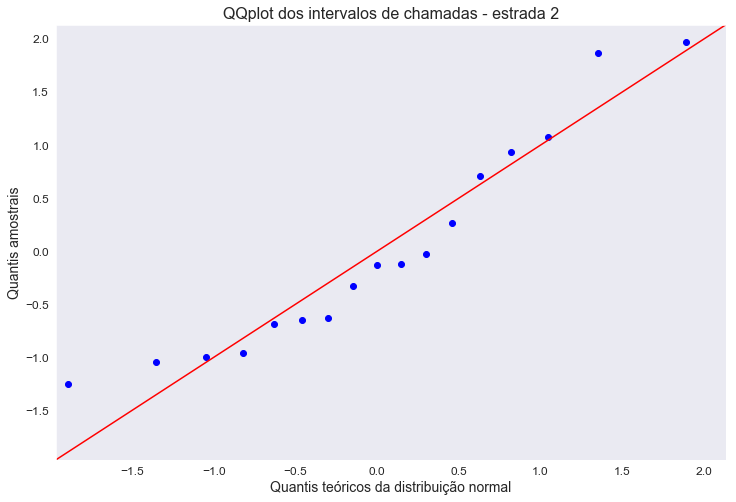

In [41]:
#QQplot para intervalos de chamadas na estrada 2

figure, ax = plt.subplots(figsize=(12,8))
ax.tick_params(labelsize = 12)
ax.set_title('QQplot dos intervalos de chamadas - estrada 2', fontdict={'fontsize': 16})
sm.qqplot(data=normalizados2.sort_values(), a=0.5, loc=0, scale=1, line = '45', ax = ax)
ax.set_xlabel('Quantis teóricos da distribuição normal', fontdict={'fontsize': 14})
ax.set_ylabel('Quantis amostrais', fontdict={'fontsize': 14})

plt.savefig('qqnorm - estrada 2', format = 'pdf', dpi=300)

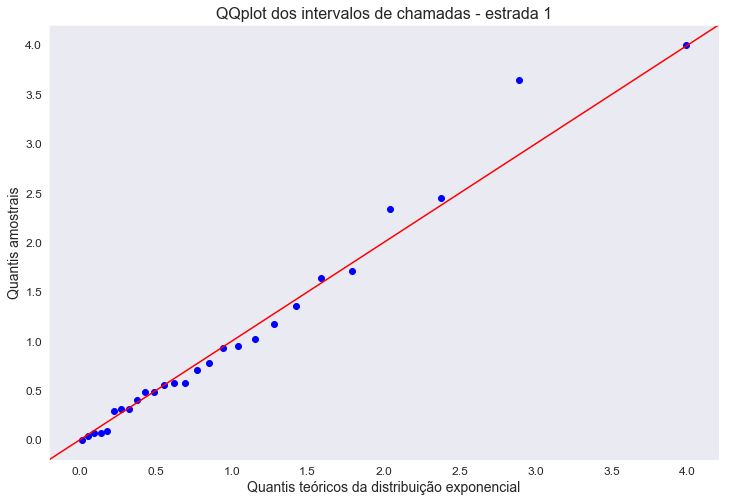

In [49]:
#QQplot para os intervalos de chamadas da estrada 1, usando os quantis da distribuição exponencial

figure, ax = plt.subplots(figsize=(12,8))
ax.tick_params(labelsize = 12)
ax.set_title('QQplot dos intervalos de chamadas - estrada 1', fontdict={'fontsize': 16})
sm.qqplot(data=normalizados1.sort_values(), dist=stats._continuous_distns.expon, a=0.5, fit=True, line = '45', ax = ax)
ax.set_xlabel('Quantis teóricos da distribuição exponencial', fontdict={'fontsize': 14})
ax.set_ylabel('Quantis amostrais', fontdict={'fontsize': 14})

plt.savefig('qqexpon - estrada 1', format = 'pdf', dpi=300)

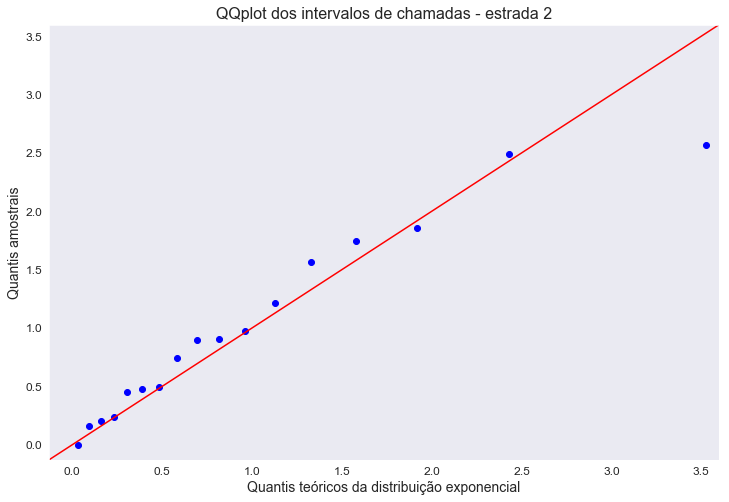

In [51]:
#QQplot dos intervalos entre chamadas na estrada 2 usando quantis da distribuição exponencial

figure, ax = plt.subplots(figsize=(12,8))
ax.tick_params(labelsize = 12)
ax.set_title('QQplot dos intervalos de chamadas - estrada 2', fontdict={'fontsize': 16})
sm.qqplot(data=normalizados2.sort_values(), dist=stats._continuous_distns.expon, a=0.5, fit=True, line = '45', ax = ax)
ax.set_xlabel('Quantis teóricos da distribuição exponencial', fontdict={'fontsize': 14})
ax.set_ylabel('Quantis amostrais', fontdict={'fontsize': 14})

plt.savefig('qqexpon - estrada 2', format = 'pdf', dpi=300)

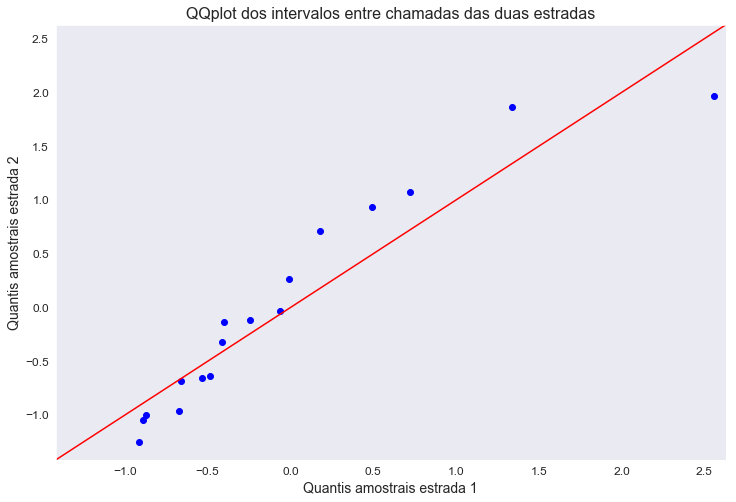

In [57]:
figure, ax = plt.subplots(figsize=(12,8))
ax.set_title('QQplot dos intervalos entre chamadas das duas estradas', fontdict={'fontsize': 16})
sm.qqplot_2samples(normalizados2, normalizados1, line ='45', ax = ax)
ax.set_xlabel('Quantis amostrais estrada 1', fontdict={'fontsize': 14})
ax.set_ylabel('Quantis amostrais estrada 2', fontdict={'fontsize': 14})
ax.tick_params(labelsize=12)

plt.savefig('Comparação de distribuições qqplot', format= 'pdf', dpi=300)

**17.c) Resposta** Com base nos gráficos QQ, vemos que a distribuição dos intervalo entre chamadas sucessivas da estrada 1 se ajusta melhor a distribuição exponencial do que a distribuição normal. Já os dados da estrada 2 não se ajustam bem a nenhuma das distribuições, entretanto tem ajuste melhor a distribuição normal se comparado com a dos dados da estrada 1.

Ao comparar as duas distribuições pelo qqplot, podemos dizer que as duas distribuições são, de fato, diferentes